In [113]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import sklearn
import seaborn as sns
from sklearn import linear_model
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV


In [114]:
crime = pd.read_csv('crime report.csv',encoding='Latin-1') #how we choose the encoding?
crime.head()

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10


In [115]:
crime.describe()

,report_year,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
count,2829.000000,2.760000e+03,2.794000e+03,2795.000000,2754.000000,2753.000000,2754.000000,2692.000000,2794.000000,2795.000000,2754.000000,2753.000000,2754.000000
mean,1995.000000,7.956981e+05,2.963255e+04,398.385331,416.278867,4405.146023,4000.245098,11.868871,1093.049810,15.372812,59.305167,566.595434,459.968112
std,11.834251,1.012451e+06,1.728630e+05,2281.276402,479.811934,6977.293769,8653.902965,1.118194,676.884678,12.350640,31.971570,369.436996,340.903534
min,1975.000000,1.007630e+05,1.540000e+02,1.000000,15.000000,15.000000,83.000000,0.000000,16.490000,0.210000,1.640000,1.610000,11.460000
25%,1985.000000,3.779310e+05,3.014750e+03,32.000000,176.250000,1467.000000,1032.000000,12.000000,625.082500,6.955000,35.775000,319.090000,210.242500
50%,1995.000000,5.366145e+05,5.135500e+03,64.000000,291.000000,2597.000000,1940.000000,12.000000,949.680000,11.980000,55.900000,487.480000,374.400000
75%,2005.000000,8.168558e+05,9.058500e+03,131.000000,465.000000,4556.000000,3609.750000,12.000000,1409.507500,20.230000,77.797500,728.240000,612.005000
max,2015.000000,8.550861e+06,1.932274e+06,24703.000000,3899.000000,71030.000000,107475.000000,12.000000,4352.830000,94.740000,199.300000,2368.220000,2337.520000


In [116]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2829 entries, 0 to 2828
Data columns (total 15 columns):
report_year            2829 non-null int64
agency_code            2788 non-null object
agency_jurisdiction    2829 non-null object
population             2760 non-null float64
violent_crimes         2794 non-null float64
homicides              2795 non-null float64
rapes                  2754 non-null float64
assaults               2753 non-null float64
robberies              2754 non-null float64
months_reported        2692 non-null float64
crimes_percapita       2794 non-null float64
homicides_percapita    2795 non-null float64
rapes_percapita        2754 non-null float64
assaults_percapita     2753 non-null float64
robberies_percapita    2754 non-null float64
dtypes: float64(12), int64(1), object(2)
memory usage: 331.6+ KB


In [117]:
crime.isnull().sum()/crime.isnull().count()

report_year            0.000000
agency_code            0.014493
agency_jurisdiction    0.000000
population             0.024390
violent_crimes         0.012372
homicides              0.012018
rapes                  0.026511
assaults               0.026865
robberies              0.026511
months_reported        0.048427
crimes_percapita       0.012372
homicides_percapita    0.012018
rapes_percapita        0.026511
assaults_percapita     0.026865
robberies_percapita    0.026511
dtype: float64

# Clean Data

## Missing values

In [118]:
fill_list = ["population","violent_crimes","homicides","rapes","assaults","robberies","months_reported","crimes_percapita",
             "homicides_percapita","rapes_percapita","assaults_percapita","robberies_percapita"]

crime1= crime.copy()

for col in fill_list:
    crime1.loc[:, col].interpolate(inplace=True)

In [119]:
crime1.isnull().sum()/crime1.isnull().count()

report_year            0.000000
agency_code            0.014493
agency_jurisdiction    0.000000
population             0.000000
violent_crimes         0.000000
homicides              0.000000
rapes                  0.000000
assaults               0.000000
robberies              0.000000
months_reported        0.000000
crimes_percapita       0.000000
homicides_percapita    0.000000
rapes_percapita        0.000000
assaults_percapita     0.000000
robberies_percapita    0.000000
dtype: float64

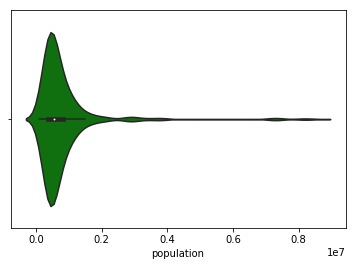

In [120]:
population = sns.violinplot(crime1['population'], color='g')

# Linear Regression Model

## Train-Test Split

In [121]:
crime1 = crime1.replace([np.inf, -np.inf], np.nan).dropna(how="all")

In [122]:
Y = crime1['violent_crimes']
X = crime1[["homicides","rapes","assaults","robberies","months_reported","crimes_percapita",'population']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

## Fitting to Training Data

In [123]:
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-Squared:')
print(regr.score(X_train, Y_train))


Coefficients: 
 [ 7.74228921e+01 -6.00952560e+00  8.59427008e-01 -1.24601583e-01
 -1.01868787e+02 -1.81529586e+00 -6.58590834e-04]

Intercept: 
 2482.297092466215

R-Squared:
0.9799747113725391


In [124]:
crime1_train = pd.concat([X_train, Y_train], axis=1)
lf = 'violent_crimes ~ homicides + rapes + assaults + robberies + months_reported + crimes_percapita + population'
lm = smf.ols(formula=lf, data=crime1_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         violent_crimes   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     9829.
Date:                Tue, 20 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:17:27   Log-Likelihood:                -16204.
No. Observations:                1414   AIC:                         3.242e+04
Df Residuals:                    1406   BIC:                         3.247e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2482.2971   6587.084  

## Dropped 'months_reported': p = 0.85

In [125]:
Y = crime1['violent_crimes']
X = crime1[["homicides","rapes","assaults","robberies","crimes_percapita",'population']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

In [126]:
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-Squared:')
print(regr.score(X_train, Y_train))


Coefficients: 
 [ 7.74219324e+01 -5.97765244e+00  8.61140660e-01 -1.25561387e-01
 -1.82540677e+00 -6.72634877e-04]

Intercept: 
 1278.3587654135335

R-Squared:
0.9799742043460956


In [127]:
crime1_train = pd.concat([X_train, Y_train], axis=1)
lf = 'violent_crimes ~ homicides + rapes + assaults + robberies + crimes_percapita + population'
lm = smf.ols(formula=lf, data=crime1_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         violent_crimes   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 1.148e+04
Date:                Tue, 20 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:17:30   Log-Likelihood:                -16204.
No. Observations:                1414   AIC:                         3.242e+04
Df Residuals:                    1407   BIC:                         3.246e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1278.3588   1634.400  

## Dropped 'population': p = 0.646

In [128]:
Y = crime1['violent_crimes']
X = crime1[["homicides","rapes","assaults","robberies","crimes_percapita"]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

In [129]:
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-Squared:')
print(regr.score(X_train, Y_train))


Coefficients: 
 [77.43380981 -6.13457561  0.79758955 -0.14177714 -1.50283655]

Intercept: 
 803.374279310854

R-Squared:
0.9799712066405148


In [130]:
crime1_train = pd.concat([X_train, Y_train], axis=1)
lf = 'violent_crimes ~ homicides + rapes + assaults + robberies + crimes_percapita'
lm = smf.ols(formula=lf, data=crime1_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         violent_crimes   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 1.378e+04
Date:                Tue, 20 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:17:37   Log-Likelihood:                -16204.
No. Observations:                1414   AIC:                         3.242e+04
Df Residuals:                    1408   BIC:                         3.245e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          803.3743   1264.586  

## Dropped 'robberies': p = 0.41

In [131]:
Y = crime1['violent_crimes']
X = crime1[["homicides","rapes","assaults","crimes_percapita"]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

In [132]:
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-Squared:')
print(regr.score(X_train, Y_train))


Coefficients: 
 [77.43051683 -7.04039975  0.69497364 -1.47240321]

Intercept: 
 1044.1816204690185

R-Squared:
0.9799615650759127


In [133]:
crime1_train = pd.concat([X_train, Y_train], axis=1)
lf = 'violent_crimes ~ homicides + rapes + assaults + crimes_percapita'
lm = smf.ols(formula=lf, data=crime1_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         violent_crimes   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 1.723e+04
Date:                Tue, 20 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:17:42   Log-Likelihood:                -16204.
No. Observations:                1414   AIC:                         3.242e+04
Df Residuals:                    1409   BIC:                         3.244e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1044.1816   1230.154  

## Dropped 'crimes_percapita': p = 0.135

In [148]:
Y = crime1['violent_crimes']
X = crime1[["homicides","rapes","assaults"]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

In [149]:
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-Squared:')
print(regr.score(X_train, Y_train))



Coefficients: 
 [77.46038852 -7.18342518  0.64842856]

Intercept: 
 -314.3732019216768

R-Squared:
0.9799297170225167


In [150]:
crime1_train = pd.concat([X_train, Y_train], axis=1)
lf = 'violent_crimes ~ homicides + rapes + assaults'
lm = smf.ols(formula=lf, data=crime1_train).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         violent_crimes   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 2.295e+04
Date:                Tue, 20 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:22:43   Log-Likelihood:                -16205.
No. Observations:                1414   AIC:                         3.242e+04
Df Residuals:                    1410   BIC:                         3.244e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -314.3732    830.481     -0.379      0.7

# Checking Assumptions

## the error term should be zero on average

In [151]:
predicted = regr.predict(X_train).ravel()
actual = Y_train
errors = actual - predicted

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: -2.647440022982583e-12


## homoscedasticity

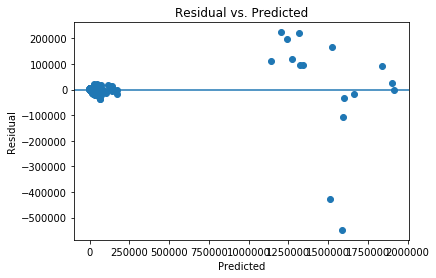

In [152]:
plt.scatter(predicted, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [153]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predicted, errors)
lev_stats = levene(predicted, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 3591.27 and p value is 0
Levene test statistic value is 21.4174 and p value is 3.86e-06


Both the chart and the test results show us that there is heteroscedasticity problem in our model. Hence, the accuracies of our estimated parameters are not reliable.

## low multicollinearity

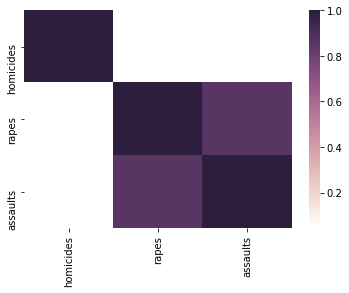

In [154]:
correlation_matrix = X_train.corr()
multicollinearity = sns.heatmap(correlation_matrix, cmap=sns.cubehelix_palette(light=1, as_cmap=True))
ticks = plt.xticks(rotation=90)

The 'rapes' and 'assaults' are very highly correlated with each other.

## error terms should be uncorrelated with one other

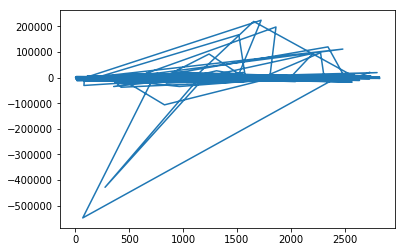

In [155]:
plt.plot(errors)
plt.show()

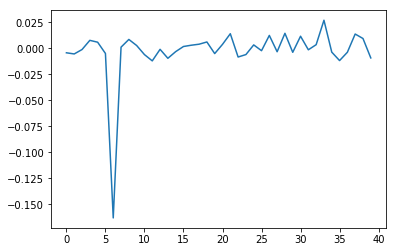

In [156]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

It seems that the errors are serially uncorrelated.

## features shouldn't be correlated with the errors

In [165]:
df = pd.concat([X_train, pd.DataFrame(errors, columns=["error"])], axis=1)
df.corr().iloc[:,-1:]

,assaults
homicides,0.051946
rapes,0.862739
assaults,1.000000


As evidenced in the table above, the features and the errors are uncorrelated.

In [170]:
lrm = LinearRegression()

alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

ridge_cv = RidgeCV(alphas=alphas, cv=5)

ridge_cv.fit(X_train, Y_train)

# We are making predictions here
Y_preds_train = lrm.predict(X_train)
Y_preds_test = lrm.predict(X_test)

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, Y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, Y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(Y_test, Y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, Y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - Y_preds_test) / Y_test)) * 100))

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

## Cross-Validation

In [ ]:
scores = cross_val_score(ridge_cv, X_test, Y_test, cv=5, scoring = 'explained_variance')
print("Explained Variance Scores: {}.".format(scores))
print("Coefficient of Determination: {:.2f}% (+/- {:.2f}%).".format(scores.mean()*100, scores.std() * 200))

# KNN Regression Models: Weighted & Unweighted

## Feature Normalization

In [ ]:
z_scaler = StandardScaler()
X = z_scaler.fit_transform(crime1[["homicides","rapes","assaults"]])

## Fitting to Data & Scoring

### k = 15

In [ ]:
#Unweighted KNN Regression.
knn = neighbors.KNeighborsRegressor(n_neighbors=15)
Y = np.column_stack([crime['violent_crimes'],crime['violent_crimes']])
X = X
knn.fit(X, Y)
T_x1 = np.arange(-1, 16.2, .1)[:, np.newaxis]
T_x2 = np.arange(-1, 16.2, .1)[:, np.newaxis]
T = np.column_stack([T_x1, T_x2])
Y_ = knn.predict(T)

plt.figure(figsize=(10,10))
plt.scatter(X, Y, color ='k', label='Data')
plt.plot(T, Y_, color ='m', label='Prediction')
plt.legend()
plt.ylabel('violent_crimes')
plt.xlabel("homicides","rapes","assaults")
plt.title('K=15, Unweighted')
plt.show()

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: {:.2f}% (+/- {:.2f})%.".format(score.mean()*100, score.std() * 200))


#Weighted KNN Regression.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=15, weights='distance')
knn_w.fit(X, Y)
Y_ = knn_w.predict(T)

plt.figure(figsize=(10,10))
plt.scatter(X, Y, color ='k', label='Data')
plt.plot(T, Y_, color ='m', label='Prediction')
plt.legend()
plt.ylabel('violent_crimes')
plt.xlabel("homicides","rapes","assaults")
plt.title('K=15, Weighted')
plt.show()

score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: {:.2f}% (+/- {:.2f})%.".format(score_w.mean()*100, score_w.std() * 200))